### Q1: PCA faces 

Use the functions below to solve the exercise

In [3]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [3]:
faces = loadmat("C:/Users/saram/NUM.LIN.ALGEBRA/faces.mat")

In [4]:
print(faces.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X'])


In [9]:
faces_data= faces['X']

In [10]:
print(f"Data shape: {faces_data.shape}")

Data shape: (5000, 1024)


The `feature_normalize()` normalizes the features in the given dataset.

In [6]:
def feature_normalize(X):
    """
    Normalizes the features in X.
    
    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.

    Returns
    -------
    X_norm : ndarray, shape (n_samples, n_features)
        Normalized training vectors.
    mu : ndarray, shape (n_feature, )
        Mean value of each feature.
    sigma : ndarray, shape (n_feature, )
        Standard deviation of each feature.
    """
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [51]:
X_norm, mu, sigma=feature_normalize(faces_data)

print(X_norm)

[[-0.31520867 -0.49753272 -0.69051451 ... -1.48580675 -1.43968522
  -1.1837002 ]
 [ 0.58394664  0.39598181  0.21914242 ... -0.08375071  0.41977144
   0.5857314 ]
 [-0.21747439 -0.27911805 -0.34686634 ... -1.48580675 -1.43968522
  -1.39603199]
 ...
 [-0.49113036 -0.08055927  0.21914242 ...  2.22226251  2.02648641
   1.62969605]
 [ 0.79896204  0.73353175  0.68407818 ... -0.15754313 -0.17597681
  -0.24590145]
 [-1.70303533 -1.70874131 -1.68102983 ...  0.87555079  0.88914885
   0.90422909]]


The `pca()` runs principal component analysis on the given dataset.

In [15]:
def pca(X):
    """
    Run principal component analysis on the dataset X.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.

    Returns
    -------
    U : ndarray, shape (n_features, n_features)
        Unitary matrices.
    S : ndarray, shape (n_features,)
        The singular values for every matrix.
    V : ndarray, shape (n_features, n_features)
        Unitary matrices.
    """
    m, n = X.shape
    sigma = X.T.dot(X) / m
    U, S, V = np.linalg.svd(sigma)
    return U, S, V

In [39]:
# PCA for normalized data 
U, S, V= pca(X_norm)

#PCA for non-normalized data
U2, S2, V2= pca(faces_data)

#print(V)

The `project_data()` projects the given data to the top K eigenvectors.

In [21]:
def project_data(X, U, K):
    """
    Computes the reduced data representation when projecting only on to the top K eigenvectors.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.
    U : ndarray, shape (n_features, n_features)
        Unitary matrices.
    K : int
        Reduced dimension.

    Returns
    -------
    Z : ndarray, shape (n_samples, K)
        The projection of X into the reduced dimensional space spanned by the first K columns of U.
    """
    Z = X.dot(U[:, 0:K])
    return Z

In [40]:
#the reduced dimension
K=75

#projected normalized data 
Z_75=project_data(X_norm, U, K)

#projected non-normalized data
Z2_75=project_data(faces_data, U2, K)

The `recover_data()` recovers an approximation of the original data from the projected data.

In [24]:
def recover_data(Z, U, K):
    """
    Recovers an approximation of the original data when using the projected data.
    
    Parameters
    ----------
    Z : ndarray, shape (n_samples, K)
        The projected data, where n_samples is the number of samples and K is the number of reduced dimensions.
    U : ndarray, shape (n_features, n_features)
        Unitary matrices, where n_features is the number of features.
    K : int
        Reduced dimension.

    Returns
    -------
    X_rec : ndarray, shape (n_samples, n_features)
        The recovered samples.
    """
    X_rec = Z.dot(U[:, 0:K].T)
    return X_rec

In [41]:
# recovered normalized data 
X_rec=recover_data(Z_75, U, K)

# recovered non-normalized data 
X2_rec=recover_data(Z2_75, U2, K)

In [33]:
def plot_faces(X, num_faces, title, size=32):
    """
    Plots the first `num_faces` faces in the dataset.

    Parameters
    ----------
    X : ndarray, shape (n_samples, n_features)
        Dataset to visualize.
    num_faces : int
        Number of faces to plot.
    """
    plt.figure(figsize=(8, 8))
    for i in range(num_faces):
        plt.subplot(5, 5, i + 1)
        plt.imshow(X[i].reshape(size, size).T, cmap='gray')
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

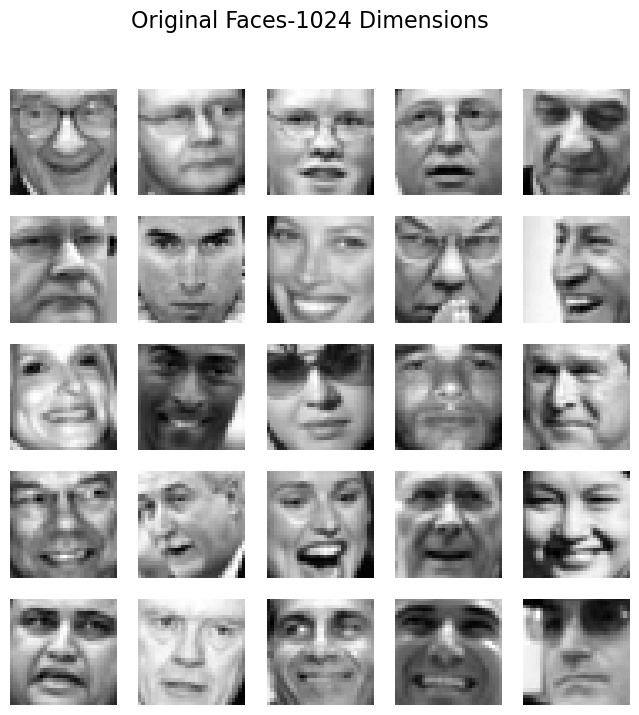

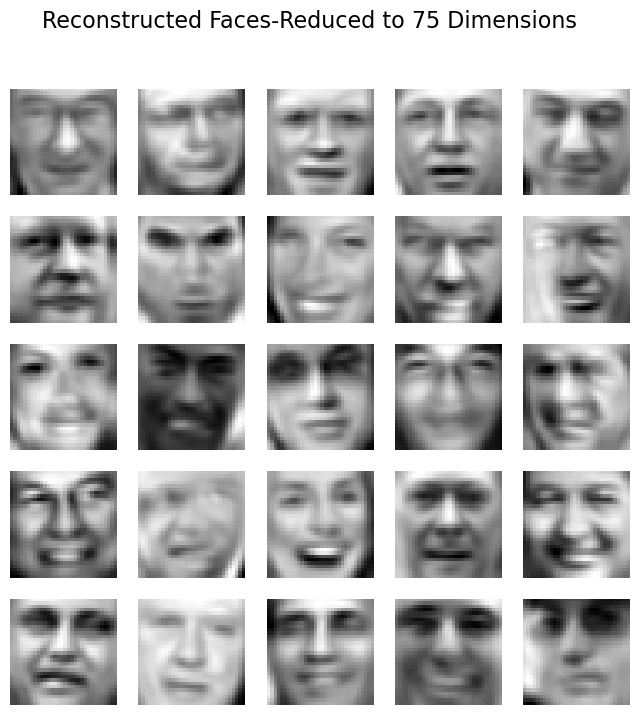

In [42]:
#fot non-normalized data
plot_faces(faces_data, 25, "Original Faces-1024 Dimensions")

plot_faces(X2_rec, 25, "Reconstructed Faces-Reduced to 75 Dimensions")

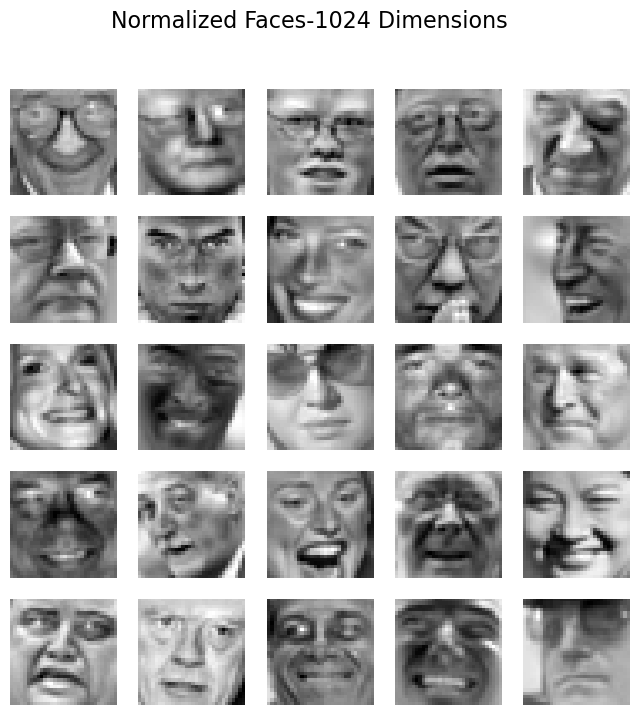

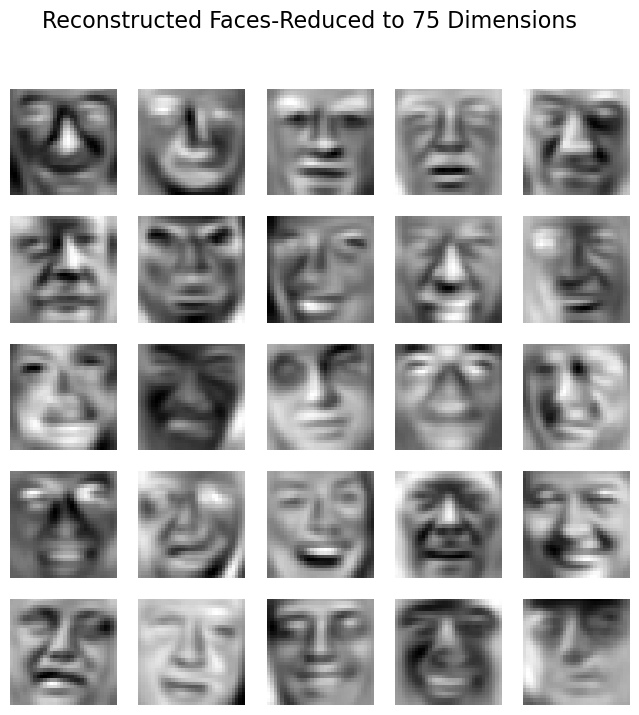

In [38]:
#for normalized data
plot_faces(X_norm, 25, "Normalized Faces-1024 Dimensions")

plot_faces(X_rec, 25, "Reconstructed Faces-Reduced to 75 Dimensions")

In [43]:
#maximum error using normalized data 
max_error = np.max(np.abs(X_norm - X_rec))

#L2 norm error (Frobenius norm)
l2_error = np.linalg.norm(X_norm - X_rec, 'fro')


print(f"Maximum Error: {max_error}")
print(f"L2 Norm Error: {l2_error}")

Maximum Error: 3.1846312703989064
L2 Norm Error: 686.5368440091152


for k=75, these error matrices values indicate some loss of detail during dimensionality reduction, but overall good performance 



In [52]:
#maximum error using non-normalized data 
max_error2 = np.max(np.abs(faces_data - X_rec))

#L2 norm error (Frobenius norm)
l2_error2 = np.linalg.norm(X_norm - X2_rec, 'fro')


print(f"Maximum Error: {max_error2}")
print(f"L2 Norm Error: {l2_error2}")

Maximum Error: 127.89594952662947
L2 Norm Error: 94304.81817318827


In [46]:
l2_norm = np.sum(np.power((X_norm-X_rec),2))

# take the square root of the sum of squares to obtain the L2 norm
l2_norm = np.sqrt(l2_norm)
print(l2_norm)

686.5368440091148


## Q2: the power method 

In [5]:
# Function to apply the power method
def power_method(A, x0, num_itr):
    """
    Calculates eigenvalues and corresponding eigenvectors 
    using the power iteration method.

    Parameters
    ----------
    A : The matrix
    x0 : The initial guess
    num_itr : number of iterations 
    
    """
    x = x0
    eigenvalues = []
    eigenvectors = []
    
    for i in range(num_itr):
        # x= Ax^(i-1), for i=1,..., num_itr
        x = np.dot(A, x)
        # Normalize the vector 
        x = x / np.linalg.norm(x)
        # Compute the Rayleigh quotient as the eigenvalue approximation
        eigenvalue = np.dot(x.T, np.dot(A, x))
        eigenvalues.append(eigenvalue)
        eigenvectors.append(x.copy())
        print(f"Iteration {i+1}:")
        print(f"  Approximate Eigenvalue: {eigenvalue}")
        print(f"  Corresponding Eigenvector: {x}")
    
    return eigenvalues, eigenvectors

In [6]:
A = np.array([[5, -1], [-1, -1]])
x0 = np.array([1, 0])

In [7]:
num_itr = 6
eigenvalues, eigenvectors = power_method(A, x0, num_itr)

Iteration 1:
  Approximate Eigenvalue: 5.153846153846155
  Corresponding Eigenvector: [ 0.98058068 -0.19611614]
Iteration 2:
  Approximate Eigenvalue: 5.161849710982657
  Corresponding Eigenvector: [ 0.9883717  -0.15205718]
Iteration 3:
  Approximate Eigenvalue: 5.162255965292844
  Corresponding Eigenvector: [ 0.98678909 -0.16201015]
Iteration 4:
  Approximate Eigenvalue: 5.162276560414158
  Corresponding Eigenvector: [ 0.98715417 -0.15977062]
Iteration 5:
  Approximate Eigenvalue: 5.162277604419932
  Corresponding Eigenvector: [ 0.98707241 -0.16027492]
Iteration 6:
  Approximate Eigenvalue: 5.162277657342395
  Corresponding Eigenvector: [ 0.98709084 -0.16016138]


In [19]:
# Exact eigenvalues and eigenvectors for comparison
eigenvalues, eigenvectors = np.linalg.eig(A)

#dominant eigenvalue (largest magnitude)
dominant_eignval = np.argmax(np.abs(eigenvalues))

# Extract the dominant eigenvalue and corresponding eigenvector
dominant_eigenvalue = eigenvalues[dominant_eignval]
dominant_eigenvector = eigenvectors[:, dominant_eignval]

print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)
print("\nDominant Eigenvalue:")
print(dominant_eigenvalue)
print("\nDominant Eigenvector:")
print(dominant_eigenvector)


Eigenvalues:
[ 5.16227766 -1.16227766]

Eigenvectors:
[[ 0.98708746  0.16018224]
 [-0.16018224  0.98708746]]

Dominant Eigenvalue:
5.162277660168379

Dominant Eigenvector:
[ 0.98708746 -0.16018224]


we can see that the dominant eigenvalue from iteration 6 is accurate to 7 decimal places compared to the exact eigenvalue. Also, we can observe the same for the corresponding eigenvectors (accurate to 2 decimal places).

Hence, the power iteration method performed well and gave accurate close results to the exact calculations with only 6 iterations.

## Q3: apply the code from Q2 on another matrix and different initial guesses 

In [20]:
A1 = np.array([[-1, 0], [0, 0]])

#print(A1)

#exact eigenvalues and vectors for A1
eigenvalues, eigenvectors = np.linalg.eig(A1)
dominant_eignval = np.argmax(np.abs(eigenvalues))

dominant_eigenvalue = eigenvalues[dominant_eignval]
dominant_eigenvector = eigenvectors[:, dominant_eignval]

print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)
print("\nDominant Eigenvalue:")
print(dominant_eigenvalue)
print("\nDominant Eigenvector:")
print(dominant_eigenvector)


Eigenvalues:
[-1.  0.]

Eigenvectors:
[[1. 0.]
 [0. 1.]]

Dominant Eigenvalue:
-1.0

Dominant Eigenvector:
[1. 0.]


In [23]:
x0_0 = np.array([0, 1]) #a=0, b=1, to see what happens if a is zero?

num_itr = 6
eigenvalues, eigenvectors = power_method(A1, x0_0, num_itr)

Iteration 1:
  Approximate Eigenvalue: nan
  Corresponding Eigenvector: [nan nan]
Iteration 2:
  Approximate Eigenvalue: nan
  Corresponding Eigenvector: [nan nan]
Iteration 3:
  Approximate Eigenvalue: nan
  Corresponding Eigenvector: [nan nan]
Iteration 4:
  Approximate Eigenvalue: nan
  Corresponding Eigenvector: [nan nan]
Iteration 5:
  Approximate Eigenvalue: nan
  Corresponding Eigenvector: [nan nan]
Iteration 6:
  Approximate Eigenvalue: nan
  Corresponding Eigenvector: [nan nan]


C:\Users\saram\AppData\Local\Temp\ipykernel_11788\1272763576.py:22: RuntimeWarning: invalid value encountered in true_divide
  x = x / np.linalg.norm(x)


In [21]:
x0_1 = np.array([1, 0]) #a=1 not zero, b=0

num_itr = 6
eigenvalues, eigenvectors = power_method(A1, x0_1, num_itr)

Iteration 1:
  Approximate Eigenvalue: -1.0
  Corresponding Eigenvector: [-1.  0.]
Iteration 2:
  Approximate Eigenvalue: -1.0
  Corresponding Eigenvector: [1. 0.]
Iteration 3:
  Approximate Eigenvalue: -1.0
  Corresponding Eigenvector: [-1.  0.]
Iteration 4:
  Approximate Eigenvalue: -1.0
  Corresponding Eigenvector: [1. 0.]
Iteration 5:
  Approximate Eigenvalue: -1.0
  Corresponding Eigenvector: [-1.  0.]
Iteration 6:
  Approximate Eigenvalue: -1.0
  Corresponding Eigenvector: [1. 0.]


In [22]:
x0_2 = np.array([-1, 0]) #a=-1 not zero, b=0

num_itr = 6
eigenvalues, eigenvectors = power_method(A1, x0_2, num_itr)

Iteration 1:
  Approximate Eigenvalue: -1.0
  Corresponding Eigenvector: [1. 0.]
Iteration 2:
  Approximate Eigenvalue: -1.0
  Corresponding Eigenvector: [-1.  0.]
Iteration 3:
  Approximate Eigenvalue: -1.0
  Corresponding Eigenvector: [1. 0.]
Iteration 4:
  Approximate Eigenvalue: -1.0
  Corresponding Eigenvector: [-1.  0.]
Iteration 5:
  Approximate Eigenvalue: -1.0
  Corresponding Eigenvector: [1. 0.]
Iteration 6:
  Approximate Eigenvalue: -1.0
  Corresponding Eigenvector: [-1.  0.]


In [25]:
x0_3 = np.array([1, 1]) #a=1 not zero, b=1 
#normalize to get a unit vector 
x0_3 = x0_3 / np.linalg.norm(x0_3)
print(x0_3)



num_itr = 6
eigenvalues, eigenvectors = power_method(A1, x0_3, num_itr)

[0.70710678 0.70710678]
Iteration 1:
  Approximate Eigenvalue: -1.0
  Corresponding Eigenvector: [-1.  0.]
Iteration 2:
  Approximate Eigenvalue: -1.0
  Corresponding Eigenvector: [1. 0.]
Iteration 3:
  Approximate Eigenvalue: -1.0
  Corresponding Eigenvector: [-1.  0.]
Iteration 4:
  Approximate Eigenvalue: -1.0
  Corresponding Eigenvector: [1. 0.]
Iteration 5:
  Approximate Eigenvalue: -1.0
  Corresponding Eigenvector: [-1.  0.]
Iteration 6:
  Approximate Eigenvalue: -1.0
  Corresponding Eigenvector: [1. 0.]


In [26]:
x0_4 = np.array([0.5, 1]) #a=1 not zero, b=1 
#normalize to get a unit vector 
x0_4 = x0_4 / np.linalg.norm(x0_4)
print(x0_4)



num_itr = 6
eigenvalues, eigenvectors = power_method(A1, x0_4, num_itr)

[0.4472136  0.89442719]
Iteration 1:
  Approximate Eigenvalue: -1.0
  Corresponding Eigenvector: [-1.  0.]
Iteration 2:
  Approximate Eigenvalue: -1.0
  Corresponding Eigenvector: [1. 0.]
Iteration 3:
  Approximate Eigenvalue: -1.0
  Corresponding Eigenvector: [-1.  0.]
Iteration 4:
  Approximate Eigenvalue: -1.0
  Corresponding Eigenvector: [1. 0.]
Iteration 5:
  Approximate Eigenvalue: -1.0
  Corresponding Eigenvector: [-1.  0.]
Iteration 6:
  Approximate Eigenvalue: -1.0
  Corresponding Eigenvector: [1. 0.]


If a≠0, the Power Method converges to the eigenvalue λ=−1(the dominant, since eigenvalues are ordered in descending order), hence, we can say that the results depends on the initial guess if it aligns with the eigenvector that corresponds to the dominant eigenvalue. While If a=0, the initial vector aligns with the eigenvector of λ=0, and the method fails to produce meaningful results because λ=0 is not dominant.

## Q8: Jacobi's and Gauss-Seidel's iterative methods 

### Jacobi :

In [200]:
def jacobi_method(A, b, x_0, num_itrs):
    """
    Perform Jacobi iterative method for solving Ax = b.
    
    Parameters:
     A: coefficient matrix
     b: right-hand side vector
     x_0: initial guess
     num_itrs: number of iterations
    
    Returns:
     x_values: Array of x values at each iteration
    """
    D = np.diag(np.diag(A))  #Diagonal matrix D
    D_inv = np.linalg.inv(D)  #Inverse of D
    I = np.eye(len(A))  #Identity matrix
    errors = []
    
    # Compute the iteration matrix I-D^-1 *A
    R = I - D_inv @ A
    #Compute constant vector D^-1 *b
    C = D_inv @ b
#     print("R shape:", R.shape)
#     print("C shape:", C.shape)
    
    
    x = x_0  # Initial guess
#     print("x shape (initial):", x.shape)
    x_vals = [x.copy()]
    
    for k in range(num_itrs):
        x_new = R @ x + C  # Jacobi update
        x_vals.append(x_new.copy())
        
        error = np.linalg.norm(b - A @ x_new) # residual error
        errors.append(error)
        
        print(f"Iteration {k + 1}: x = {x_new}")  # Print the solution after each iteration
        x = x_new  # Update for the next iteration
    
    return x_vals, errors

In [202]:
AA= np.array([[2,1,1],[1,2,1],[1,1,2]])
bb=np.array([[4],[4],[4]]).ravel()
x_0 = np.array([[0],[0],[0]]).ravel()
num_itrs=3

print('A=', AA)
print('b=', bb)
print('x_0=', x_0)

A= [[2 1 1]
 [1 2 1]
 [1 1 2]]
b= [4 4 4]
x_0= [0 0 0]


In [203]:
x_vals, errors=jacobi_method(AA, bb, x_0, num_itrs)

Iteration 1: x = [2. 2. 2.]
Iteration 2: x = [0. 0. 0.]
Iteration 3: x = [2. 2. 2.]


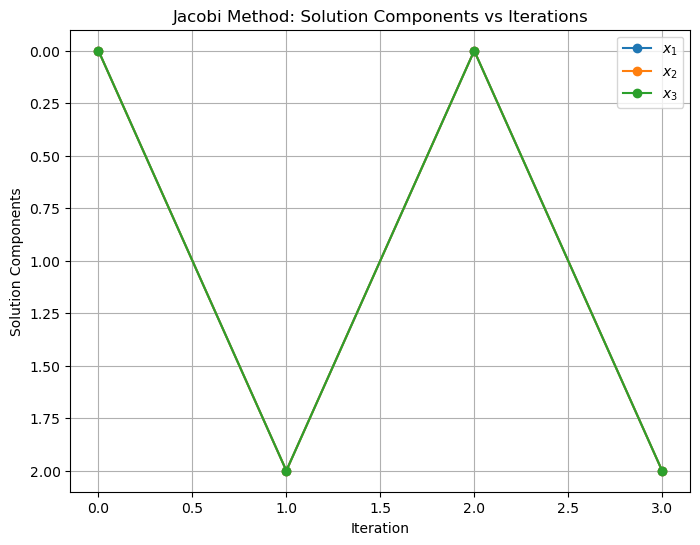

In [204]:
x_vals_array = np.array(x_vals)

plt.figure(figsize=(8, 6))
for i in range(x_vals_array.shape[1]):  # Loop over components (x1, x2, x3)
    plt.plot(range(len(x_vals_array)), x_vals_array[:, i], marker='o', linestyle='-', label=f"$x_{i+1}$")
    
plt.title("Jacobi Method: Solution Components vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Solution Components")
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

### Gauss-Seidel :

In [195]:
def gauss_seidel_method(A, b, x_0, num_itrs):
    """
    Perform Gauss-Seidel iterative method for solving Ax = b.
    
     Parameters:
     A: coefficient matrix
     b: right-hand side vector
     x_0: initial guess
     num_itrs: number of iterations
    
    Returns:
     x_valss: Array of x values at each iteration
    """
    # Decompose A into D, L, and U
    D = np.diag(np.diag(A))  # Diagonal matrix
    L = np.tril(A, k=-1)  #lower triangular matrix
    U = np.triu(A, k=1)  #upper triangular matrix
    errorss = []
    
    #Compute (D + L)^-1
    D_plus_L_inv = np.linalg.inv(D + L)
    
    #Compute the iteration matrix -(D+L)^-1 *U
    R = -D_plus_L_inv @ U
    #Compute constant vector (D+L)^-1 *b
    c = D_plus_L_inv @ b
    
    
    # Initial guess
    x = x_0.copy()
    x_valss = [x.copy()]
    
    for k in range(num_itrs):
        x = R @ x + c #Gauss-Seidel update
        x_valss.append(x.copy())
        
        error = np.linalg.norm(b - A @ x)
        errorss.append(error)
        print(f"Iteration {k + 1}: x = {x}")
       
    
    return x_valss, errorss

In [198]:
x_valss, errorss = gauss_seidel_method(AA, bb, x_0, num_itrs)

Iteration 1: x = [2.  1.  0.5]
Iteration 2: x = [1.25   1.125  0.8125]
Iteration 3: x = [1.03125   1.078125  0.9453125]


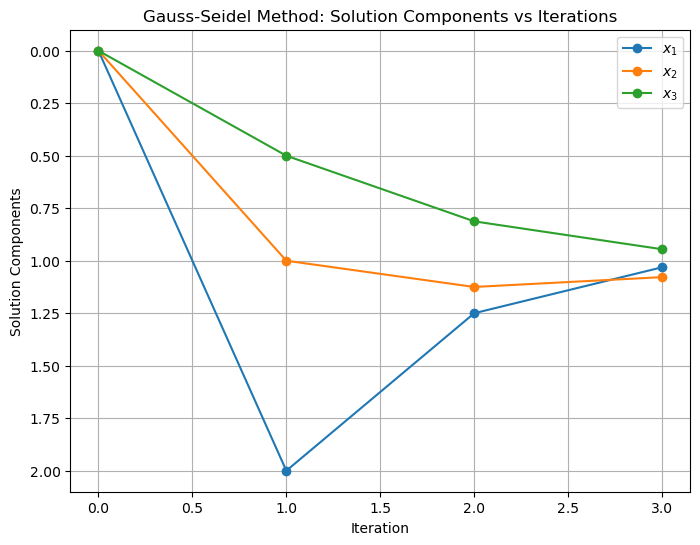

In [199]:
x_valss_array = np.array(x_valss)

plt.figure(figsize=(8, 6))
for i in range(x_valss_array.shape[1]):  # Loop over components (x1, x2, x3)
    plt.plot(range(len(x_valss_array)), x_valss_array[:, i], marker='o', linestyle='-', label=f"$x_{i+1}$")
    
plt.title("Gauss-Seidel Method: Solution Components vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Solution Components")
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

## Q9: check which method converges faster

In [205]:
# use the functions from Q8
A9 = np.array([[5,-1,-1,-1,-1],[-1,5,-1,-1,-1],[-1,-1,5,-1,-1],[-1,-1,-1,5,-1],[-1,-1,-1,-1,5]])
b9 = np.array([[1],[1],[1],[1],[1]]).ravel()

x_0 = np.array([[0],[0],[0],[0],[0]]).ravel()
num_itrs=10

print('A=', A9)
print('b=', b9)
print('x_0=', x_0)

A= [[ 5 -1 -1 -1 -1]
 [-1  5 -1 -1 -1]
 [-1 -1  5 -1 -1]
 [-1 -1 -1  5 -1]
 [-1 -1 -1 -1  5]]
b= [1 1 1 1 1]
x_0= [0 0 0 0 0]


Iteration 1: x = [0.2 0.2 0.2 0.2 0.2]
Iteration 2: x = [0.36 0.36 0.36 0.36 0.36]
Iteration 3: x = [0.488 0.488 0.488 0.488 0.488]
Iteration 4: x = [0.5904 0.5904 0.5904 0.5904 0.5904]
Iteration 5: x = [0.67232 0.67232 0.67232 0.67232 0.67232]
Iteration 6: x = [0.737856 0.737856 0.737856 0.737856 0.737856]
Iteration 7: x = [0.7902848 0.7902848 0.7902848 0.7902848 0.7902848]
Iteration 8: x = [0.83222784 0.83222784 0.83222784 0.83222784 0.83222784]
Iteration 9: x = [0.86578227 0.86578227 0.86578227 0.86578227 0.86578227]
Iteration 10: x = [0.89262582 0.89262582 0.89262582 0.89262582 0.89262582]


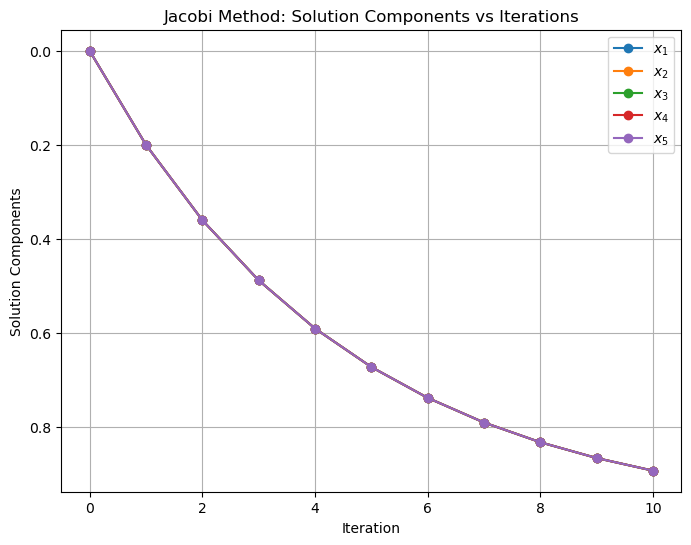

In [209]:
#Jacobi
x_vals9, errors9=jacobi_method(A9, b9, x_0, num_itrs)

x_vals9_array = np.array(x_vals9)

plt.figure(figsize=(8, 6))
for i in range(x_vals9_array.shape[1]):  # Loop over components (x1, x2, x3)
    plt.plot(range(len(x_vals9_array)), x_vals9_array[:, i], marker='o', linestyle='-', label=f"$x_{i+1}$")
    
plt.title("Jacobi Method: Solution Components vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Solution Components")
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

Iteration 1: x = [0.2     0.24    0.288   0.3456  0.41472]
Iteration 2: x = [0.457664   0.5011968  0.54383616 0.58348339 0.61723607]
Iteration 3: x = [0.64915048 0.67874122 0.70572223 0.73017    0.75275679]
Iteration 4: x = [0.77347805 0.79242541 0.80976605 0.82568526 0.84027095]
Iteration 5: x = [0.85362954 0.86587036 0.87709122 0.88737241 0.89679271]
Iteration 6: x = [0.90542534 0.91333634 0.92058536 0.92722795 0.933315  ]
Iteration 7: x = [0.93889293 0.94400425 0.94868802 0.95298004 0.95691305]
Iteration 8: x = [0.96051707 0.96381964 0.96684596 0.96961914 0.97216036]
Iteration 9: x = [0.97448902 0.9766229  0.97857828 0.98037011 0.98201206]
Iteration 10: x = [0.98351667 0.98489543 0.98615885 0.9873166  0.98837751]


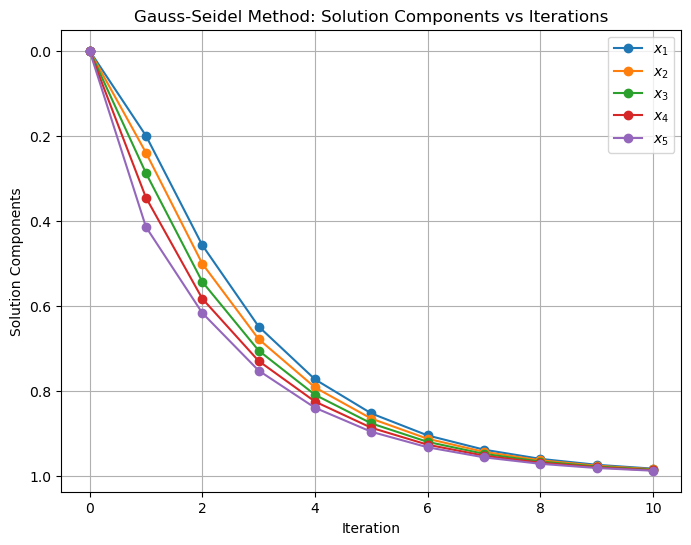

In [208]:
#Gauss-Seidel
x_valss9, errorss9 = gauss_seidel_method(A9, b9, x_0, num_itrs)

x_valss9_array = np.array(x_valss9)

plt.figure(figsize=(8, 6))
for i in range(x_valss9_array.shape[1]):  # Loop over components (x1, x2, x3)
    plt.plot(range(len(x_valss9_array)), x_valss9_array[:, i], marker='o', linestyle='-', label=f"$x_{i+1}$")
    
plt.title("Gauss-Seidel Method: Solution Components vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Solution Components")
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

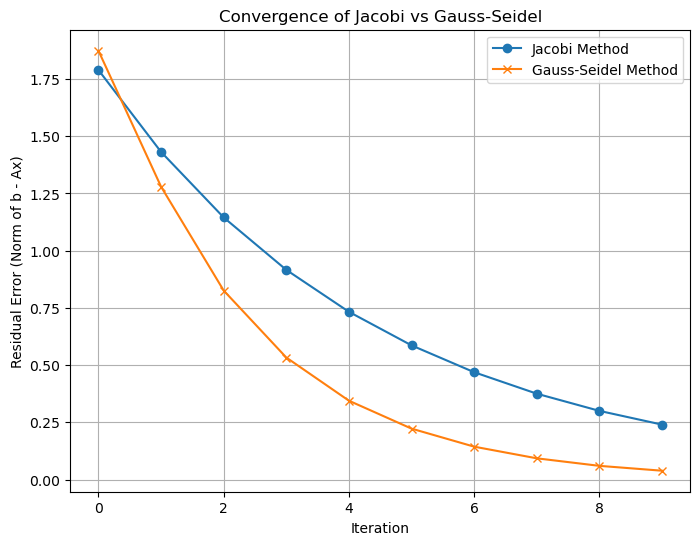

In [210]:
# plotting the errors for each method to compare which converges faster
plt.figure(figsize=(8, 6))
plt.plot(range(num_itrs), errors9, label="Jacobi Method", marker='o')
plt.plot(range(num_itrs), errorss9, label="Gauss-Seidel Method", marker='x')
plt.title("Convergence of Jacobi vs Gauss-Seidel")
plt.xlabel("Iteration")
plt.ylabel("Residual Error (Norm of b - Ax)")
plt.legend()
plt.grid(True)
plt.show()

We can see clearly that the Gauss-Seidel method reduces the residual error faster than the Jacobi method during the same number of iterations. Hence, The Gauss-Seidel method converges faster than the Jacobi method for this system. 